In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as ticker

### Combine news factors with the topics dataframe

In [2]:
all_topic = pd.read_csv("all_topic.csv", header = 0, delimiter = ",")
all_topic.drop(labels = ["Unnamed: 0"], axis = 1, inplace = True)
all_topic.head()

,created_at,text,id,author_id,lang,username,text_clean,source_media,topic,probs
0,2021-12-31 12:06:05,'That was not the basis of the CDC's decision'...,1476887381336801280,2836421,en,MSNBC,that was not the basis of the cdcs decision dr...,1,13,0.707392
1,2021-12-30 02:46:02,'That was not the basis of the CDC's decision'...,1476384051154112512,2836421,en,MSNBC,that was not the basis of the cdcs decision dr...,1,13,0.698642
2,2021-12-29 13:31:07,'That was not the basis of the CDC's decision'...,1476184003526938624,2836421,en,MSNBC,that was not the basis of the cdcs decision dr...,1,13,0.708475
3,2021-12-29 06:31:02,'That was not the basis of the CDC's decision'...,1476078288661581824,2836421,en,MSNBC,that was not the basis of the cdcs decision dr...,1,13,0.713273
4,2021-08-25 19:34:01,Delta Air Lines CEO tells employees that they ...,1430614459077349376,2836421,en,MSNBC,delta air lines ceo tells employees that they ...,1,13,0.600323


In [3]:
all_topic = all_topic[all_topic.topic != -1] # remove the outlier topic
all_topic.reset_index(drop=True, inplace=True)

In [4]:
len(all_topic)

98859

In [5]:
all_topic["topic"].value_counts()

0      6209
1      4286
2      3512
3      3502
4      3369
       ... 
167     111
168     108
169     107
170     106
171     101
Name: topic, Length: 172, dtype: int64

In [6]:
all_topic['Date'] = pd.to_datetime(all_topic['created_at'])

In [7]:
df = all_topic.groupby([pd.Grouper(key='Date', axis=0, freq='1D', sort=True), 'topic', 'source_media']).size().unstack(fill_value=0)
df = df.reset_index()
df.rename(columns={0: 'attention_organization', 1: 'attention_media'}, inplace=True)

In [8]:
len(df)

28824

In [9]:
df['month_year'] = df['Date'].dt.to_period('M')

In [10]:
df.tail()

source_media,Date,topic,attention_organization,attention_media,month_year
28819,2021-12-31,122,0,1,2021-12
28820,2021-12-31,123,0,1,2021-12
28821,2021-12-31,149,1,0,2021-12
28822,2021-12-31,160,0,1,2021-12
28823,2021-12-31,169,1,0,2021-12


In [11]:
newsfactors = pd.read_csv("newsfactor.csv", header = 0, delimiter = ",")
newsfactors.drop(labels = ["Unnamed: 0"], axis = 1, inplace = True)
newsfactors.drop(index = newsfactors.index[0], axis=0, inplace=True)
newsfactors.head()

,created_at,text,id,author_id,lang,username,text_clean,source_media,topic,probs,...,negative_consequences,negative_consequences_llm_cot,positive_consequences,positive_consequences_llm_cot,scope,scope_llm_cot,controversy,controversy_llm_cot,surprise,surprise_llm_cot
1,2021-01-29 09:09:06,"CORONAVIRUS LATEST: An additional 3,872 fatali...",1355080518845530112,28785486,en,ABC,coronavirus latest an additional 3872 fataliti...,1,0,1.0,...,1,The tweet explicitly mentioned a rising number...,0,No explicit mention of positive consequence.,1,"The tweet explicitly mentioned 'nationwide', s...",0,No explicit mention of opposing opinions and d...,0,No explicit mention of something unexpected or...
2,2021-01-23 18:36:23,CORONAVIRUS LATEST: Week-to-week comparisons s...,1353048953642754048,28785486,en,ABC,coronavirus latest weektoweek comparisons show...,1,0,1.0,...,0,"No explicit mention of negative consequence, s...",1,The tweet explicitly mentioned that new deaths...,0,No explicit mention of scope. The tweet mentio...,0,No explicit mention of opposing opinions and d...,0,No explicit mention of something unexpected or...
3,2021-01-22 11:04:04,"CORONAVIRUS LATEST: An additional 3,955 fatali...",1352572737844371456,28785486,en,ABC,coronavirus latest an additional 3955 fataliti...,1,0,1.0,...,1,The tweet explicitly mentioned a rising number...,0,No explicit mention of positive consequence.,1,"The tweet explicitly mentioned 'nationwide', s...",0,No explicit mention of opposing opinions and d...,0,No explicit mention of something unexpected or...
4,2021-01-18 11:45:00,Groups nationwide are strategizing grassroots ...,1351133485742895104,15754281,en,USATODAY,groups nationwide are strategizing grassroots ...,1,0,1.0,...,1,The tweet explicitly mentioned that people of ...,1,The tweet explicitly mentioned ensuring access...,1,The tweet explicitly mentioned 'people of colo...,1,The tweet explicitly mentioned opposing opinio...,0,No explicit mention of something unexpected or...
5,2021-02-04 00:00:00,"At this time last year, the U.S. was preparing...",1357116659115425792,28785486,en,ABC,at this time last year the us was preparing fo...,1,0,1.0,...,1,The tweet explicitly mentioned that the US has...,0,No explicit mention of positive consequence.,1,The tweet explicitly mentioned 'the US' as a f...,0,No explicit mention of opposing opinions and d...,0,No explicit mention of something unexpected or...


In [12]:
newsfactors['created_at'] = pd.to_datetime(newsfactors['created_at'])
newsfactors['month_year'] = newsfactors['created_at'].dt.to_period('M')

In [13]:
factor_cols = ['surprise', 'controversy', 'scope', 'positive_consequences', 'negative_consequences', 'elite_persons']

# Melt the DataFrame to long format for easier groupby
melted = newsfactors.melt(id_vars=['topic', 'month_year'], value_vars=factor_cols, 
                          var_name='factor', value_name='value')

In [14]:
counts = melted.groupby(['topic', 'month_year', 'factor']).sum().reset_index()
counts['present'] = (counts['value'] > 3).astype(int)
factors = counts.pivot(index=['topic', 'month_year'], columns='factor', values='present').fillna(0).astype(int).reset_index()

In [15]:
all_data= df.merge(
    factors,
    on=['topic', 'month_year'],
    how='left'
)

In [16]:
all_data.head()

,Date,topic,attention_organization,attention_media,month_year,controversy,elite_persons,negative_consequences,positive_consequences,scope,surprise
0,2021-01-01,0,2,3,2021-01,0,0,0,0,0,0
1,2021-01-01,1,5,4,2021-01,0,0,0,0,0,0
2,2021-01-01,2,6,0,2021-01,0,0,0,1,0,0
3,2021-01-01,3,5,0,2021-01,0,0,0,0,0,0
4,2021-01-01,4,3,0,2021-01,0,0,0,0,0,0


In [17]:
all_data.isna().sum()

Date                      0
topic                     0
attention_organization    0
attention_media           0
month_year                0
controversy               0
elite_persons             0
negative_consequences     0
positive_consequences     0
scope                     0
surprise                  0
dtype: int64

In [18]:
len(all_data)

28824

In [19]:
all_data['newsworthiness'] = all_data.iloc[:, 5:11].sum(axis=1)

### Create lagged IV and DV for time series analysis

In [20]:
data = pd.DataFrame()

for n in np.arange(0,172):
    df = all_data.loc[all_data['topic'] == n]
    df['lag_attention_media'] = df['attention_media'].shift(1)
    df['lag_attention_organization'] = df['attention_organization'].shift(1)
    df = df.iloc[1:,:] #drop first row, because the lag_attention_media and lag_attention_organization will be nan
    data = data.append(df,ignore_index=True)

/var/folders/xk/pmj2yzyx4cn8730gfyfy07x9p_tk4b/T/ipykernel_73306/2123005701.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lag_attention_media'] = df['attention_media'].shift(1)
/var/folders/xk/pmj2yzyx4cn8730gfyfy07x9p_tk4b/T/ipykernel_73306/2123005701.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lag_attention_organization'] = df['attention_organization'].shift(1)
/var/folders/xk/pmj2yzyx4cn8730gfyfy07x9p_tk4b/T/ipykernel_73306/2123005701.py:8: FutureWarning: The frame.append method is 

In [21]:
len(data) #172 first rows were dropped, which is in accordance with the number of topics, so the codes worked correctly

28652

In [22]:
len(all_data)

28824

In [23]:
label = pd.read_csv("topic_labels.csv", header = 0, delimiter = ",")
data = data.merge(
    label[['topic','topic_label']],
    on=['topic'],
    how='left'
)

In [24]:
len(data)

28652

In [25]:
data.tail()

,Date,topic,attention_organization,attention_media,month_year,controversy,elite_persons,negative_consequences,positive_consequences,scope,surprise,newsworthiness,lag_attention_media,lag_attention_organization,topic_label
28647,2021-12-16,171,1,0,2021-12,0,0,0,0,0,0,0,0.0,1.0,Union Pacific issues
28648,2021-12-20,171,1,0,2021-12,0,0,0,0,0,0,0,0.0,1.0,Union Pacific issues
28649,2021-12-22,171,2,0,2021-12,0,0,0,0,0,0,0,0.0,1.0,Union Pacific issues
28650,2021-12-28,171,1,0,2021-12,0,0,0,0,0,0,0,0.0,2.0,Union Pacific issues
28651,2021-12-30,171,1,0,2021-12,0,0,0,0,0,0,0,0.0,1.0,Union Pacific issues


In [27]:
data.to_csv("final_data.csv", sep = ",")

### Visualization

In [37]:
data = pd.read_csv("final_data.csv", header = 0, delimiter = ",")
data.drop(labels = ["Unnamed: 0"], axis = 1, inplace = True)

In [38]:
data['Date'] = pd.to_datetime(data['Date'])

In [39]:
top5 = data.loc[data['topic'].isin([0,1,2,3,4])]

In [40]:
top5 = top5.groupby(['topic_label', pd.Grouper(key='Date', freq='W-MON')])[['attention_organization', 'attention_media']].sum().reset_index().sort_values('Date')

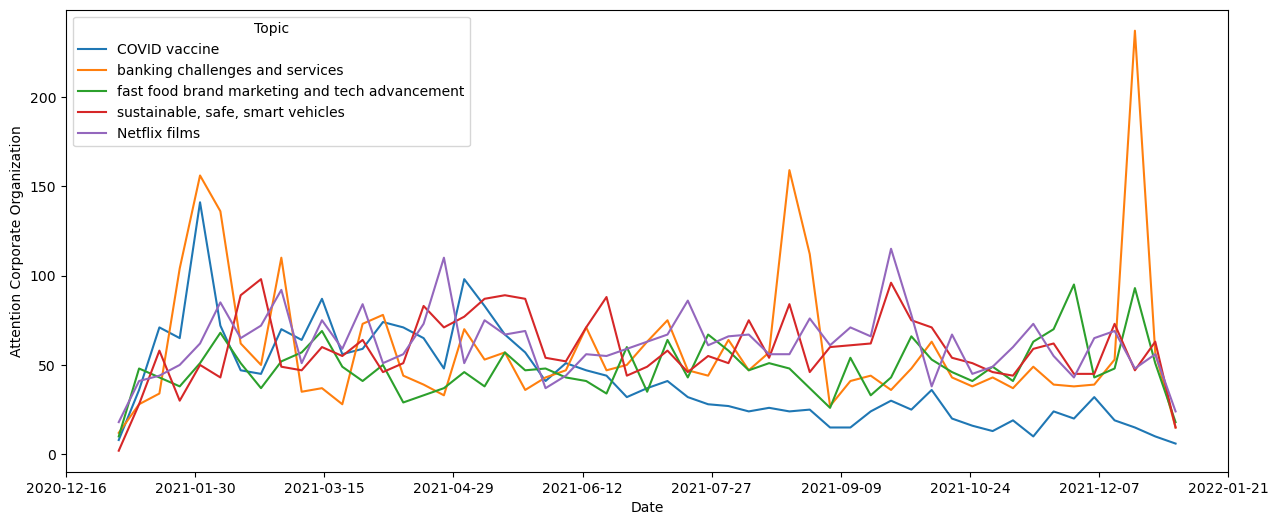

In [41]:
# Plot the change of the corporate organizations' attention
fig, ax = plt.subplots(figsize=(15,6))
plot = sns.lineplot(x='Date', y='attention_organization', hue='topic_label', data=top5)
plot.legend(title="Topic")
plot.set_ylabel("Attention Corporate Organization")
plot.xaxis.set_major_locator(ticker.LinearLocator(10))

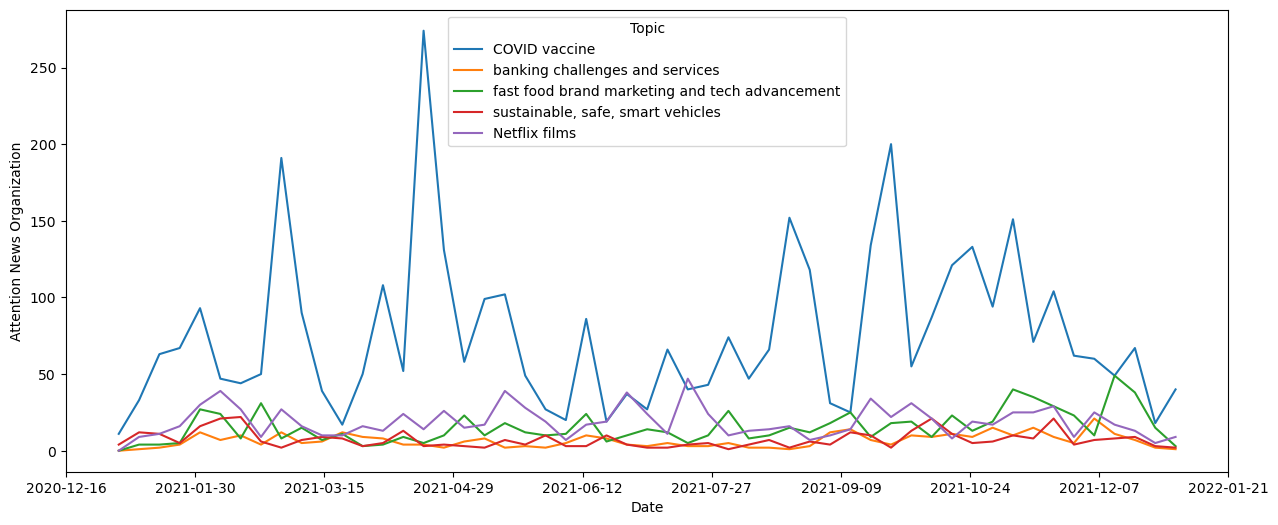

In [42]:
# Plot the change of the media organizations' attention
fig, ax = plt.subplots(figsize=(15,6))
plot = sns.lineplot(x='Date', y='attention_media', hue='topic_label', data=top5)
plot.legend(title="Topic")
plot.set_ylabel("Attention News Organization")
plot.xaxis.set_major_locator(ticker.LinearLocator(10))

### Descriptive statistcs

In [34]:
data.tail()

,Date,topic,attention_organization,attention_media,month_year,controversy,elite_persons,negative_consequences,positive_consequences,scope,surprise,newsworthiness,lag_attention_media,lag_attention_organization,topic_label
28647,2021-12-16,171,1,0,2021-12,0,0,0,0,0,0,0,0.0,1.0,Union Pacific issues
28648,2021-12-20,171,1,0,2021-12,0,0,0,0,0,0,0,0.0,1.0,Union Pacific issues
28649,2021-12-22,171,2,0,2021-12,0,0,0,0,0,0,0,0.0,1.0,Union Pacific issues
28650,2021-12-28,171,1,0,2021-12,0,0,0,0,0,0,0,0.0,2.0,Union Pacific issues
28651,2021-12-30,171,1,0,2021-12,0,0,0,0,0,0,0,0.0,1.0,Union Pacific issues


In [33]:
len(data)

28652

In [28]:
nf = data[['newsworthiness','topic', 'month_year','surprise', 'controversy', 'scope', 'positive_consequences', 'negative_consequences', 'elite_persons']].drop_duplicates()

In [30]:
nf.head()

,newsworthiness,topic,month_year,surprise,controversy,scope,positive_consequences,negative_consequences,elite_persons
0,0,0,2021-01,0,0,0,0,0,0
30,1,0,2021-02,0,0,1,0,0,0
58,1,0,2021-03,0,0,1,0,0,0
89,1,0,2021-04,0,0,1,0,0,0
119,0,0,2021-05,0,0,0,0,0,0


In [31]:
nf['newsworthiness'].value_counts()

0    1083
1     565
2     290
3      54
4      10
Name: newsworthiness, dtype: int64

In [35]:
for col in ['surprise', 'controversy', 'scope', 'positive_consequences', 'negative_consequences', 'elite_persons']:
    s = nf[col].value_counts()
    print(s)

0    2001
1       1
Name: surprise, dtype: int64
0    1905
1      97
Name: controversy, dtype: int64
0    1595
1     407
Name: scope, dtype: int64
0    1378
1     624
Name: positive_consequences, dtype: int64
0    1880
1     122
Name: negative_consequences, dtype: int64
0    1906
1      96
Name: elite_persons, dtype: int64


In [36]:
total_corp = data['attention_organization'].sum()

In [37]:
newsworthiness_volume = data.groupby('newsworthiness')['attention_organization'].sum()

In [38]:
(newsworthiness_volume / total_corp)*100

newsworthiness
0    56.138861
1    29.191436
2    13.367560
3     0.853084
4     0.449059
Name: attention_organization, dtype: float64

In [43]:
for col in ['surprise', 'controversy', 'scope', 'positive_consequences', 'negative_consequences', 'elite_persons']:
    volume = data.groupby(col)['attention_organization'].sum()
    print((volume / total_corp)*100)

surprise
0    99.99614
1     0.00386
Name: attention_organization, dtype: float64
controversy
0    98.109833
1     1.890167
Name: attention_organization, dtype: float64
scope
0    78.026969
1    21.973031
Name: attention_organization, dtype: float64
positive_consequences
0    69.474253
1    30.525747
Name: attention_organization, dtype: float64
negative_consequences
0    96.268561
1     3.731439
Name: attention_organization, dtype: float64
elite_persons
0    97.842199
1     2.157801
Name: attention_organization, dtype: float64


In [39]:
total_media = data['attention_media'].sum()

In [40]:
newsworthiness_volume = data.groupby('newsworthiness')['attention_media'].sum()

In [41]:
(newsworthiness_volume / total_media)*100

newsworthiness
0    29.596003
1    31.647211
2    28.323005
3     8.315319
4     2.118461
Name: attention_media, dtype: float64

In [44]:
for col in ['surprise', 'controversy', 'scope', 'positive_consequences', 'negative_consequences', 'elite_persons']:
    volume = data.groupby(col)['attention_media'].sum()
    print((volume / total_media)*100)

surprise
0    99.966374
1     0.033626
Name: attention_media, dtype: float64
controversy
0    79.435077
1    20.564923
Name: attention_media, dtype: float64
scope
0    51.433924
1    48.566076
Name: attention_media, dtype: float64
positive_consequences
0    85.569486
1    14.430514
Name: attention_media, dtype: float64
negative_consequences
0    76.639285
1    23.360715
Name: attention_media, dtype: float64
elite_persons
0    85.24283
1    14.75717
Name: attention_media, dtype: float64
